In [8]:
# Matrix diagonalization
# H : Hamiltonian matrix, size : N x N
import numpy as np
import matplotlib.pyplot as plt
# big plot size setting, 
plt.rcParams["figure.figsize"] = (8,8)

def Hamiltonian_diagonalization(H):
    import numpy as np
    # Diagonalize the Hamiltonian matrix
    eigvals, eigvecs = np.linalg.eigh(H)
    # Sort the eigenvalues and eigenvectors in ascending order
    idx = eigvals.argsort()
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]
    return eigvals, eigvecs
def Ham(N,h,theta):
    H=np.zeros((2*N+1,2*N+1))
    for i in range(2*N):
        H[i,i+1]=1/2
        H[i+1,i]=1/2
    for i in range(2*N+1):
        H[i,i]=((h*((i-N)+theta/(2*np.pi)))**2)/2
    return H



In [4]:
Hamiltonian=Ham(100,1,3.14)
eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
print(eigvals[0:5])
Hamiltonian=Ham(100,1,0)
eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
print(eigvals[0:5])

[-0.53239786  0.28975105  1.15768019  1.33387906  3.16610856]
[-0.53506485  0.34336013  0.85363435  2.05650441  2.08122736]


In [18]:
def plot_E_h(h1,h2,theta):
    h=np.arange(h1,h2,(h2-h1)/100)
    E=[]
    for i in h:
        Hamiltonian=Ham(100,i,theta)
        eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
        E.append(eigvals[0])
    plt.scatter(np.array(h),np.array(E),s=1,c='r')
    plt.plot(np.array(h),np.array(h)/2-1,c='k')
    plt.xlabel('h')
    plt.ylabel('E')
    plt.show()
    #return h,E
def plot_diff(h1,h2):
    h=np.arange(h1,h2,(h2-h1)/100)
    E1=[]
    E2=[]
    for i in h:
        Hamiltonian=Ham(100,i,np.pi)
        eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
        E1.append(eigvals[0])
        Hamiltonian=Ham(100,i,0)
        eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
        E2.append(eigvals[0])
    plt.plot(np.array(h),np.array(h)/2-1,c='k',label='first order perturbation theory')
    plt.scatter(np.array(h),np.array(E1),s=5,c='r',label='$\Theta=\pi$')
    plt.scatter(np.array(h),np.array(E2),s=5,c='b',label='$\Theta=0$')
    plt.xlabel('$\hbar$',fontsize=15)
    plt.ylabel('$E_G$',fontsize=15)
    plt.legend(prop={'size': 15})
    plt.savefig('E_G.png',dpi=500)
    plt.show()
    plt.scatter(1/np.array(h),np.array(E1)-np.array(E2),s=5,c='r',label='measured')
    # xlabel : 1/\hbar, ylabel : difference of E
    h=np.arange(2e-1,1.0e0,(2e0-5e-1)/100)
    dE=[]
    for i in h:
        Hamiltonian=Ham(100,i,np.pi)
        eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
        E1=eigvals[0]
        Hamiltonian=Ham(100,i,0)
        eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
        E2=eigvals[0]
        dE.append(E1-E2)
    a,b=np.polyfit(1/np.array(h),np.log(np.array(dE)),1)
    h=np.arange(h1*2,h2,(h2-h1)/100)
    plt.plot(1/np.array(h),np.exp(a/np.array(h)+b),c='k',label='linear fit')
    plt.xlabel('1/$\hbar$',fontsize=15)
    plt.ylabel('$E_G(\pi)-E_G(0)$',fontsize=15)
    plt.yscale('log')
    plt.legend(prop={'size': 15})
    plt.savefig('E_G_diff.png',dpi=500)

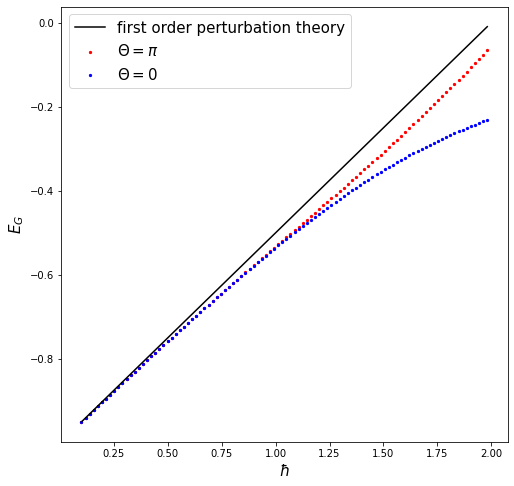

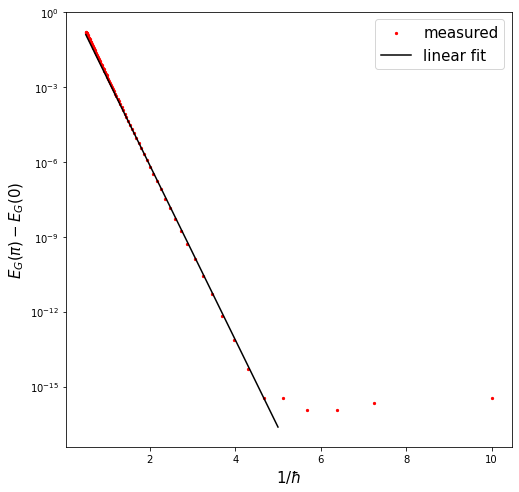

In [19]:
plot_diff(1e-1,2e-0)

-8.051041375873043 1.9788371572797314
7.999994186776272


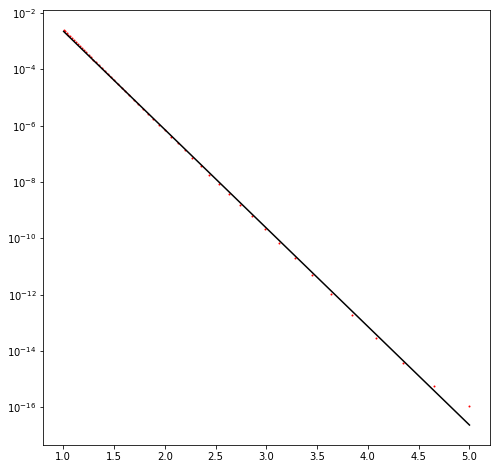

In [141]:
h=np.arange(2e-1,1.0e0,(2e0-5e-1)/100)
dE=[]
for i in h:
    Hamiltonian=Ham(100,i,np.pi)
    eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
    E1=eigvals[0]
    Hamiltonian=Ham(100,i,0)
    eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
    E2=eigvals[0]
    dE.append(E1-E2)
def instanton_action():
    dx=0.01
    x=np.arange(0,2*np.pi,dx)
    S=0
    for i in x:
        S+=dx*(np.sqrt(2*(1-np.cos(i))))
    return S
# linear fitting
a,b=np.polyfit(1/np.array(h),np.log(np.array(dE)),1)
print(a,b)
print(instanton_action())
# plot the fitting line
plt.scatter(1/np.array(h),np.array(dE),s=1,c='r')
plt.plot(1/np.array(h),np.exp(a/np.array(h)+b),c='k')
plt.yscale('log')
plt.show()

